In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)
[[-281600. -121856. -121856.]
 [-281600. -121856. -121856.]
 [-281600. -120832. -123904.]
 ...
 [  -4096.  -84992.   21504.]
 [  -9216.  -90112.   31744.]
 [ -16384.  -98304.   33792.]]


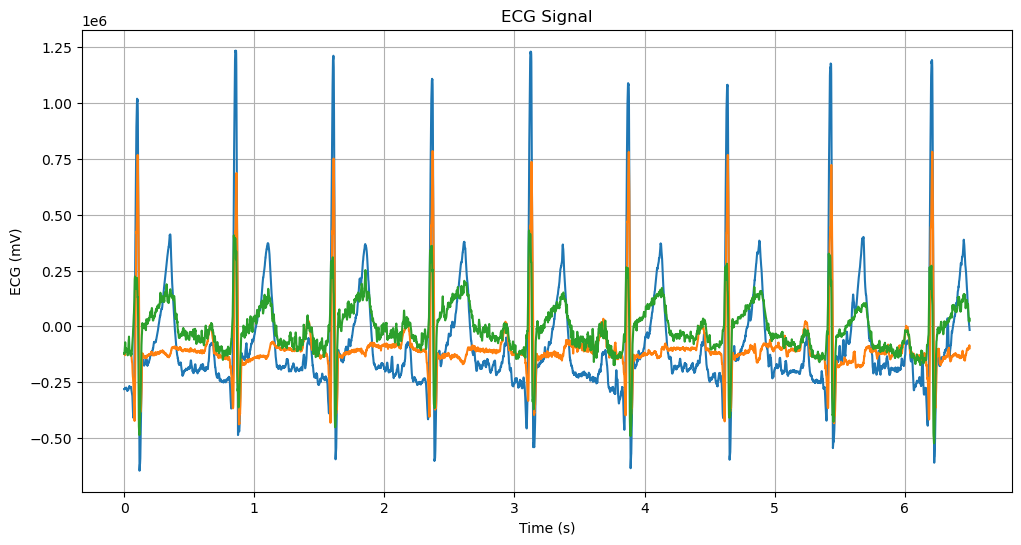

In [ ]:
data = np.loadtxt('ECGu.txt')
print(data)
print(data.shape)

ECGmv = data * 1024
print(ECGmv)

fs = 1000
t = np.arange(ECGmv.shape[0]) / fs

num_leads = ECGmv.shape[1] if ECGmv.ndim > 1 else 1

fig, axes = plt.subplots(num_leads, 1, figsize=(12, 3 * num_leads), sharex=True)

if num_leads == 1:
    axes = [axes]  # Make it iterable

for i in range(num_leads):
    axes[i].plot(t, ECGmv[:, i] if num_leads > 1 else ECGmv)
    axes[i].set_ylabel(f'Lead {i+1} (mV)')
    axes[i].set_title(f'ECG Lead {i+1}')
    axes[i].grid()

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)
[[-281600. -121856. -121856.]
 [-281600. -121856. -121856.]
 [-281600. -120832. -123904.]
 ...
 [  -4096.  -84992.   21504.]
 [  -9216.  -90112.   31744.]
 [ -16384.  -98304.   33792.]]


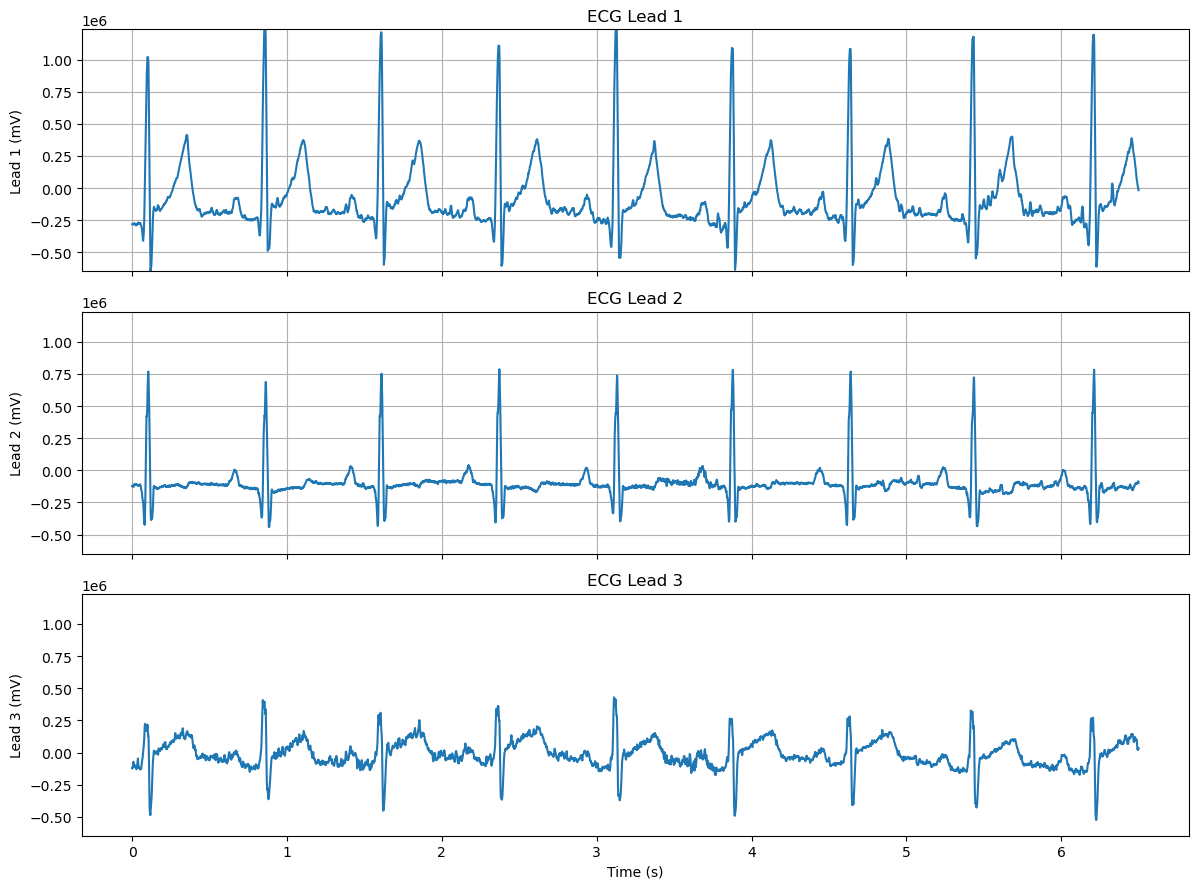

In [12]:
# ...existing code...
data = np.loadtxt('ECGu.txt')
print(data)
print(data.shape)

ECGmv = data * 1024
print(ECGmv)

fs = 1000
t = np.arange(ECGmv.shape[0]) / fs

num_leads = ECGmv.shape[1] if ECGmv.ndim > 1 else 1

fig, axes = plt.subplots(num_leads, 1, figsize=(12, 3 * num_leads), sharex=True)

if num_leads == 1:
    axes = [axes]  # Make it iterable

# Find global min and max for y-axis
ymin = np.min(ECGmv)
ymax = np.max(ECGmv)

for i in range(num_leads):
    axes[i].plot(t, ECGmv[:, i] if num_leads > 1 else ECGmv)
    axes[i].set_ylabel(f'Lead {i+1} (mV)')
    axes[i].set_title(f'ECG Lead {i+1}')
    axes[i].grid()
    axes[i].set_ylim(ymin, ymax)  # Set same y-axis scale

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.grid()
plt.show()
# ...existing code...